Name: Salman Mahboob
Student no: 8813022

Univariate Linear Regression Model using Diabetes Dataset
 importing all the necessary modules

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns   
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True,as_frame=True)
df=datasets.load_diabetes(return_X_y=True,as_frame=True)

Data Exploration: 

In [80]:
diabetes_X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [109]:
diabetes_X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [105]:
diabetes_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


Data Visualization 

Plots used to make sense of data is trying convey:-
    1. Barplot between bmi and age to find relationship between and any anomaly
    2. Scatterplot between age and bmi based upon sex
    3. Correaltion matrix: To find how much inpedendent variable are related or dependent on dependent variable

In [64]:
fig = px.bar(diabetes_X, x="bmi", y="age", color="bmi", title="Realtionship")
fig.show()

In [65]:
fig = px.scatter(diabetes_X, x="age", y="bmi", color="sex", symbol="sex")
fig.show()

In [85]:
df = pd.merge(diabetes_X, diabetes_y, left_index=True, right_index=True)
df


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


Text(0.5, 1.0, 'Heatmap to find Correlations')

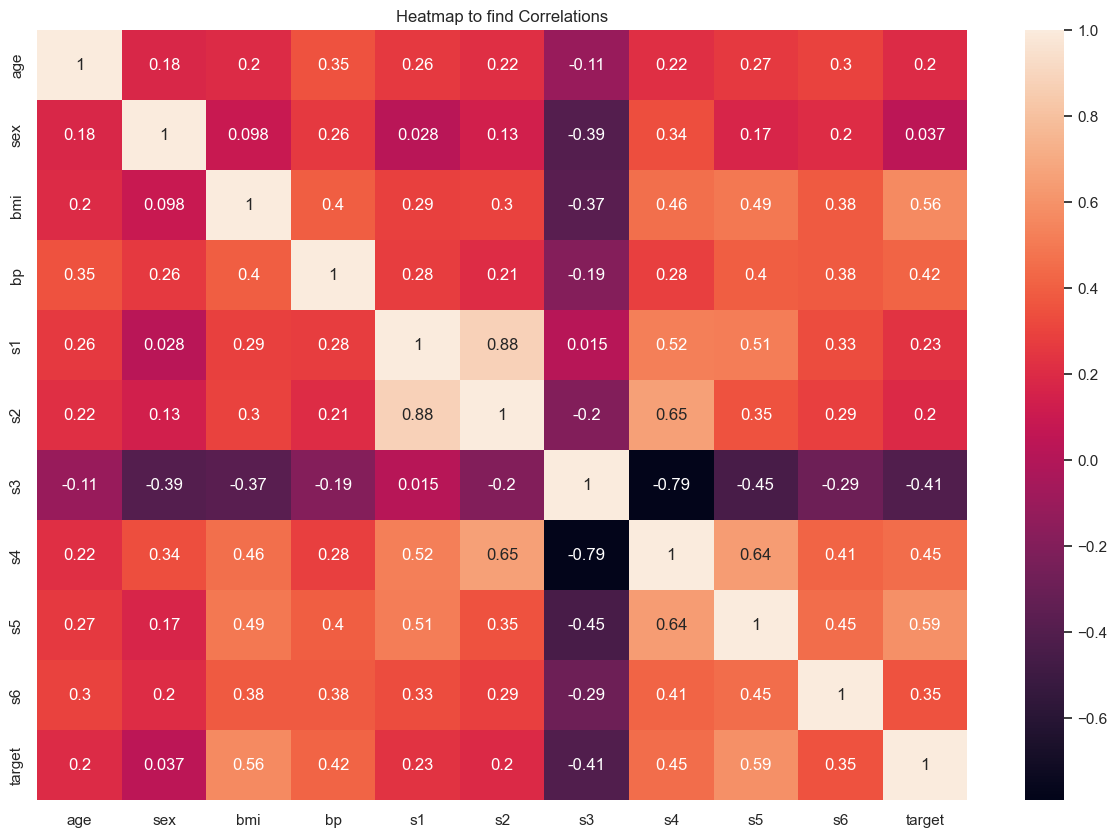

In [86]:
sns.heatmap(df.corr(method="spearman"), annot=True)
plt.title('Heatmap to find Correlations')

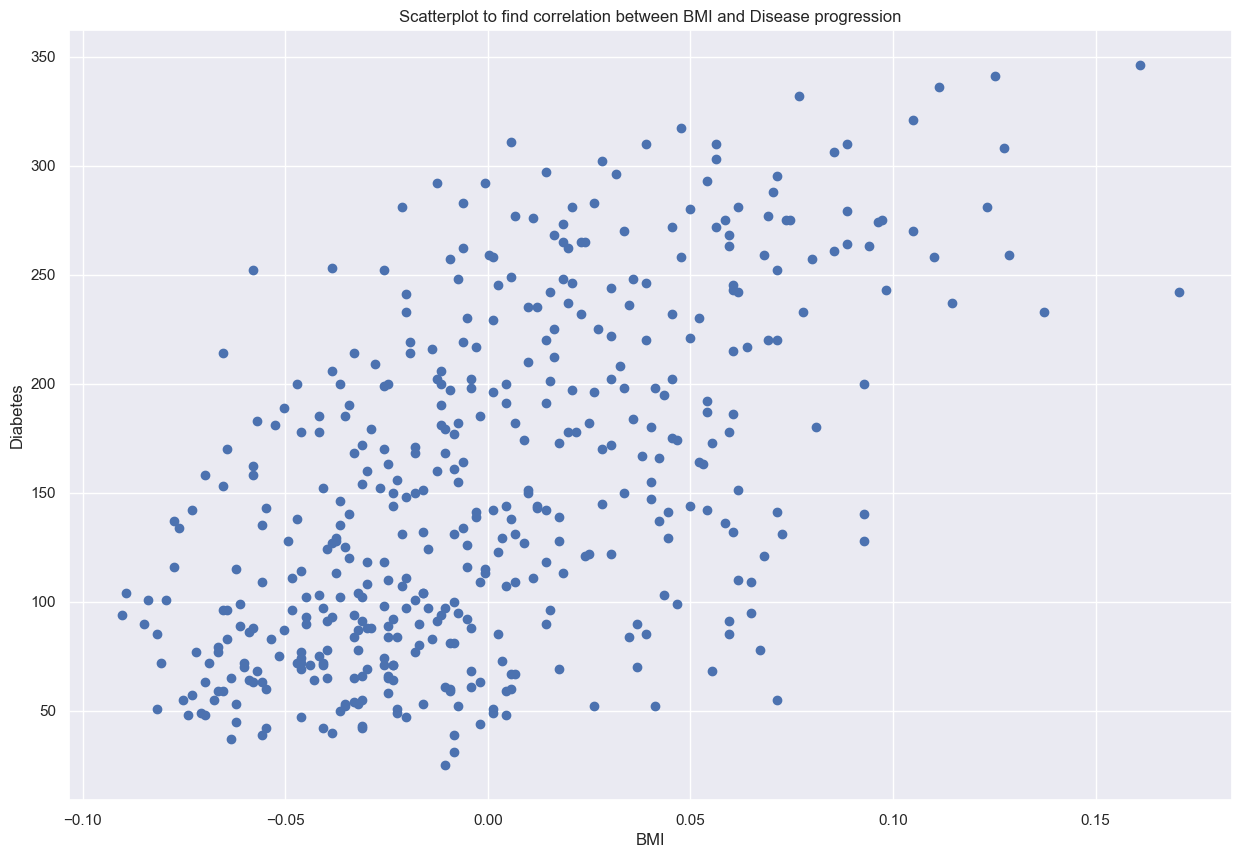

In [110]:
import matplotlib.pyplot as plt

plt.scatter(diabetes_X['bmi'], diabetes_y)
plt.xlabel('BMI')
plt.ylabel('Diabetes')
plt.title('Scatterplot to find correlation between BMI and Disease progression')

plt.show()

Reshaping the Independent variable to sinlge column

In [92]:
X = np.array(diabetes_X["bmi"]).reshape(-1, 1)

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

Splitting the dataset in training and testing using scikit learn module, and dividing into ratio of 40 to 60

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, diabetes_y, test_size=0.4, random_state=8)
X_train

array([[ 0.08001901],
       [ 0.04768465],
       [-0.00189471],
       [ 0.00457217],
       [ 0.05307371],
       [-0.00297252],
       [-0.05039625],
       [-0.00405033],
       [-0.00405033],
       [ 0.03906215],
       [ 0.03690653],
       [ 0.04013997],
       [-0.01267283],
       [ 0.01966154],
       [-0.01482845],
       [-0.02560657],
       [-0.03422907],
       [ 0.01211685],
       [-0.03961813],
       [-0.04285156],
       [ 0.00457217],
       [-0.04069594],
       [ 0.04984027],
       [ 0.02181716],
       [-0.06656343],
       [ 0.00672779],
       [-0.04716281],
       [ 0.09834182],
       [ 0.00672779],
       [ 0.08864151],
       [ 0.00349435],
       [-0.0191397 ],
       [ 0.04121778],
       [ 0.09295276],
       [-0.00836158],
       [ 0.01535029],
       [-0.03530688],
       [-0.0374625 ],
       [ 0.03582872],
       [-0.02452876],
       [ 0.11019775],
       [ 0.00564998],
       [ 0.07139652],
       [-0.06656343],
       [-0.06548562],
       [ 0

In [106]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [97]:
y_pred = model.predict(X_test)
y_pred

array([317.52842821, 111.50708939, 148.10986532, 104.1865342 ,
       142.88089733, 134.51454854, 193.07899004, 196.21637083,
       157.5220077 , 148.10986532, 211.9032748 , 116.73605738,
        84.31645584, 121.96502537, 181.57526046, 184.71264125,
        86.40804303,  76.99590065, 156.4762141 ,  95.82018541,
       227.59017877, 127.19399336, 146.01827812, 147.06407172,
       172.16311807, 192.03319644, 121.96502537, 209.8116876 ,
       115.69026378,  91.63701102, 209.8116876 , 209.8116876 ,
       142.88089733, 161.70518209,  93.72859822, 308.11628582,
        83.27066224,  95.82018541, 166.93415008, 119.87343817,
       130.33137415,  81.17907504, 188.89581564,  92.68280462,
        72.81272626, 107.32391499,  64.44637747, 116.73605738,
       238.04811475,  94.77439182, 162.75097569, 211.9032748 ,
       105.2323278 , 147.06407172, 206.67430681, 200.39954522,
       127.19399336,  93.72859822, 177.39208606, 143.92669093,
       139.74351653, 161.70518209, 218.17803639, 156.47

In [101]:
print('Coefficient: \n', model.coef_)
print('intercept: ', model.intercept_)

Coefficient: 
 [970.29308116]
intercept:  152.0398724816075


In [102]:
print('Mean squared error: %.2f' % metrics.mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.2f' % metrics.mean_absolute_error(y_test, y_pred))

Mean squared error: 3829.38
Mean absolute error: 51.96


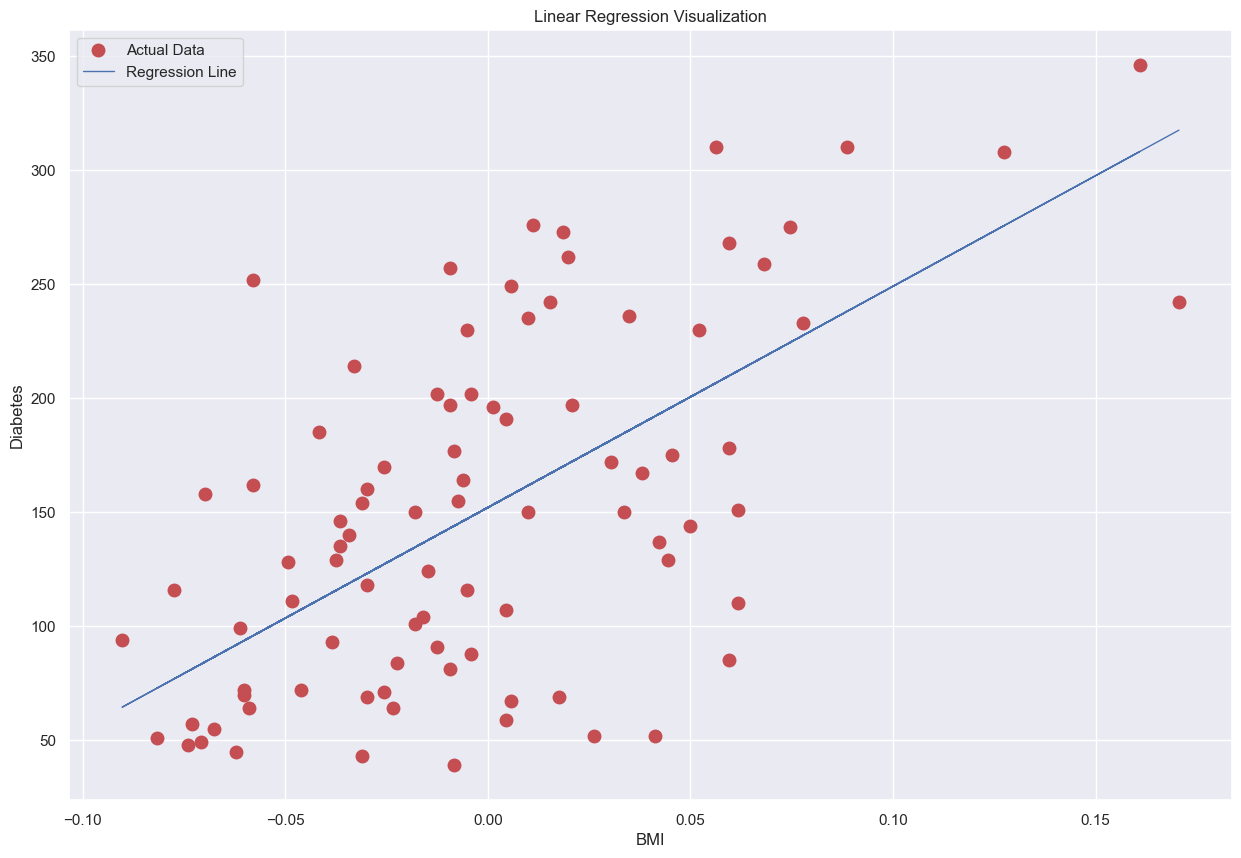

In [108]:
plt.plot(X_test, y_test, 'ro', label='Actual Data', markersize=9)  
plt.plot(X_test, y_pred, 'b-', label='Regression Line', linewidth=1)  
plt.xlabel('BMI')
plt.ylabel('Diabetes')
plt.title('Linear Regression Visualization')

plt.legend()

plt.grid(True)
plt.show()


Based on the findings, it's clear that the dataset is ill-suited for the Linear Regression Model. This is evident from the substantial errors in the Loss function and the widely scattered data points on the graph. These observations indicate a significant level of variance among the data points, making it unsuitable for a reliable linear regression model.